## Estadística Aplicada
Sesión 13 28sep

Salvador Almaguer Orta - 2076430 - gpo 44

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
import yfinance as yf

# Tamaño grafica
plt.rcParams['figure.figsize'] = (10,6)

In [29]:
# importar datos de walmex
walmex = yf.download('WALMEX.MX',
                     start='2016-04-01',
                     end='2022-12-30',
                     progress=False
                     )

In [30]:
walmex = walmex[['Adj Close']]

Text(0, 0.5, 'MXN')

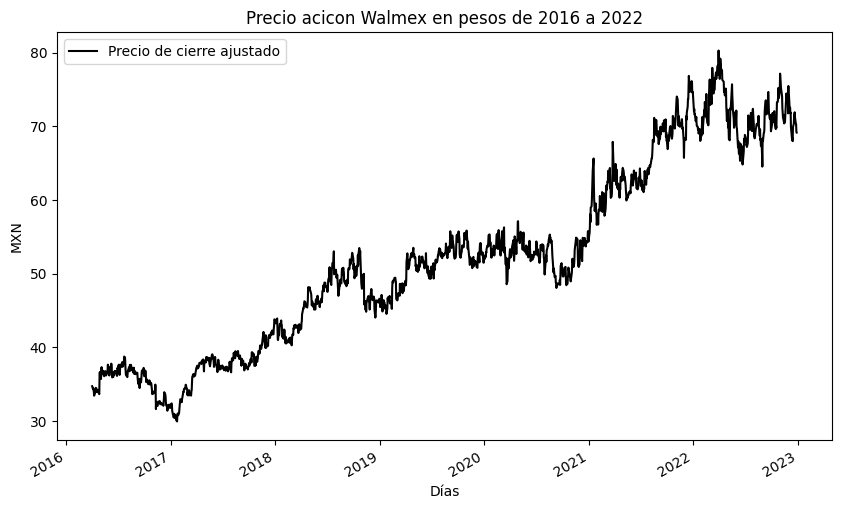

In [31]:
walmex = walmex.rename(columns={'Adj Close':'Precio de cierre ajustado'})
# Alpha para transaparencia, 1->No transparente, 0->Transparente
walmex.plot(color ='black', alpha=1)
plt.title('Precio acicon Walmex en pesos de 2016 a 2022')
plt.xlabel('Días')
plt.ylabel('MXN')

In [32]:
# Calcular señal en corto y largo plazo
# Señal corto
walmex['PMS-10'] = walmex['Precio de cierre ajustado'].rolling(10).mean()
# Señal largo plazo
walmex['PMS-50'] = walmex['Precio de cierre ajustado'].rolling(50).mean()

Text(0, 0.5, 'MXN')

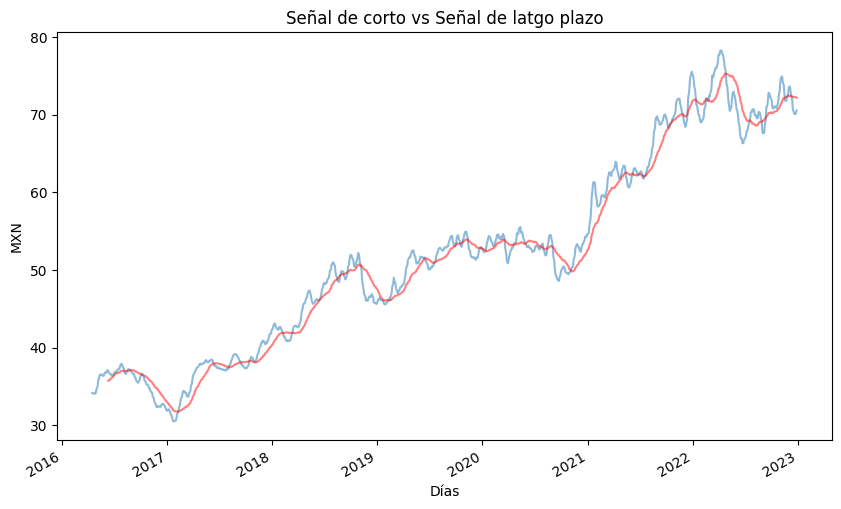

In [33]:
walmex['PMS-10'].plot( alpha=0.5)
walmex['PMS-50'].plot(color='red', alpha=0.5)
plt.title('Señal de corto vs Señal de latgo plazo')
plt.xlabel('Días')
plt.ylabel('MXN')


In [34]:
walmex['decision']=walmex['PMS-10']>walmex['PMS-50']

In [35]:
walmex['decision1'] = np.where(walmex['decision']==True,'Comprar/Mantener', 'Vender')

In [38]:
# pct_change() -> (P_t-P_t-1)/P_t-1
walmex['retorno'] = walmex['Precio de cierre ajustado'].pct_change()